In [1]:
# importing libraries used for the project/analysis
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
#%matplotlib inline # inline magic command added to display plots 
import warnings 
warnings.filterwarnings('ignore') 

### Project Description 

For this analysis the "Formula 1 World Championship (1950 - 2024)" datafiles were used which are publicly available here:(https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020/code)
The files were retrieved on 07/01/2025 

#### File contents; basic EDA

In [4]:
statusdata = pd.read_csv('./status.csv',low_memory=False) 
statusdata.head(10) 

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine
5,6,Gearbox
6,7,Transmission
7,8,Clutch
8,9,Hydraulics
9,10,Electrical


In [5]:
sprintresultsdata = pd.read_csv('./sprint_results.csv',low_memory=False) 
sprintresultsdata.head(15) 

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,fastestLapTime,statusId
0,1,1061,830,9,33,2,1,1,1,3,17,25:38.426,1538426,14,1:30.013,1
1,2,1061,1,131,44,1,2,2,2,2,17,+1.430,1539856,17,1:29.937,1
2,3,1061,822,131,77,3,3,3,3,1,17,+7.502,1545928,17,1:29.958,1
3,4,1061,844,6,16,4,4,4,4,0,17,+11.278,1549704,16,1:30.163,1
4,5,1061,846,1,4,6,5,5,5,0,17,+24.111,1562537,16,1:30.566,1
5,6,1061,817,1,3,7,6,6,6,0,17,+30.959,1569385,17,1:30.640,1
6,7,1061,4,214,14,11,7,7,7,0,17,+43.527,1581953,17,1:31.773,1
7,8,1061,20,117,5,10,8,8,8,0,17,+44.439,1582865,17,1:31.687,1
8,9,1061,847,3,63,8,9,9,9,0,17,+46.652,1585078,17,1:32.208,1
9,10,1061,839,214,31,13,10,10,10,0,17,+47.395,1585821,16,1:32.183,1


In [6]:
seasonsdata = pd.read_csv('./seasons.csv',low_memory=False) 
seasonsdata.head(10) 

,year,url
0,2009,http://en.wikipedia.org/wiki/2009_Formula_One_...
1,2008,http://en.wikipedia.org/wiki/2008_Formula_One_...
2,2007,http://en.wikipedia.org/wiki/2007_Formula_One_...
3,2006,http://en.wikipedia.org/wiki/2006_Formula_One_...
4,2005,http://en.wikipedia.org/wiki/2005_Formula_One_...
5,2004,http://en.wikipedia.org/wiki/2004_Formula_One_...
6,2003,http://en.wikipedia.org/wiki/2003_Formula_One_...
7,2002,http://en.wikipedia.org/wiki/2002_Formula_One_...
8,2001,http://en.wikipedia.org/wiki/2001_Formula_One_...
9,2000,http://en.wikipedia.org/wiki/2000_Formula_One_...


In [7]:
racesdata = pd.read_csv('./races.csv',low_memory=False) 
racesdata.head(10) 

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
5,6,2009,6,6,Monaco Grand Prix,2009-05-24,12:00:00,http://en.wikipedia.org/wiki/2009_Monaco_Grand...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
6,7,2009,7,5,Turkish Grand Prix,2009-06-07,12:00:00,http://en.wikipedia.org/wiki/2009_Turkish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
7,8,2009,8,9,British Grand Prix,2009-06-21,12:00:00,http://en.wikipedia.org/wiki/2009_British_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
8,9,2009,9,20,German Grand Prix,2009-07-12,12:00:00,http://en.wikipedia.org/wiki/2009_German_Grand...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
9,10,2009,10,11,Hungarian Grand Prix,2009-07-26,12:00:00,http://en.wikipedia.org/wiki/2009_Hungarian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [8]:
racesdata_circuitid = racesdata[racesdata['circuitId']==1]
racesdata_circuitid

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
17,18,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
35,36,2007,1,1,Australian Grand Prix,2007-03-18,03:00:00,http://en.wikipedia.org/wiki/2007_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
54,55,2006,3,1,Australian Grand Prix,2006-04-02,14:00:00,http://en.wikipedia.org/wiki/2006_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
70,71,2005,1,1,Australian Grand Prix,2005-03-06,14:00:00,http://en.wikipedia.org/wiki/2005_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
89,90,2004,1,1,Australian Grand Prix,2004-03-07,\N,http://en.wikipedia.org/wiki/2004_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
107,108,2003,1,1,Australian Grand Prix,2003-03-09,\N,http://en.wikipedia.org/wiki/2003_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
123,124,2002,1,1,Australian Grand Prix,2002-03-03,\N,http://en.wikipedia.org/wiki/2002_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
140,141,2001,1,1,Australian Grand Prix,2001-03-04,\N,http://en.wikipedia.org/wiki/2001_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
157,158,2000,1,1,Australian Grand Prix,2000-03-12,\N,http://en.wikipedia.org/wiki/2000_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [9]:
pitstopsdata = pd.read_csv('./pit_stops.csv',low_memory=False) 
pitstopsdata.head(10) 

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842
5,841,22,1,13,17:24:29,23.643,23643
6,841,20,1,14,17:25:17,22.603,22603
7,841,814,1,14,17:26:03,24.863,24863
8,841,816,1,14,17:26:50,25.259,25259
9,841,67,1,15,17:27:34,25.342,25342


In [10]:
laptimesdata = pd.read_csv('./lap_times.csv',low_memory=False) 
laptimesdata.head() 

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [11]:
driversdata = pd.read_csv('./drivers.csv',low_memory=False) 
driversdata.head() 

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [12]:
driverstandingsdata = pd.read_csv('./driver_standings.csv',low_memory=False) 
driverstandingsdata.head() 

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


In [13]:
constructorsdata = pd.read_csv('./constructors.csv',low_memory=False) 
constructorsdata.head() 

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [14]:
constructorstandingsdata = pd.read_csv('./constructor_standings.csv',low_memory=False) 
constructorstandingsdata.head() 

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0


In [15]:
constructorresultsdata = pd.read_csv('./constructor_results.csv',low_memory=False) 
constructorresultsdata.head() 

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N


In [16]:
circuitsdata = pd.read_csv('./circuits.csv',low_memory=False) 
circuitsdata.head() 

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [17]:
statusdata = pd.read_csv('./status.csv',low_memory=False) 
statusdata.head() 

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


In [18]:
racedata = pd.read_csv('./results.csv',low_memory=False)
racedata.head() 

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


#### Driver: Mika Häkkinen 

In [72]:
# Load the CSV file
file_path = "drivers.csv"
drivers_df = pd.read_csv(file_path)

# Display the first few rows to understand the structure
drivers_df.head()

# Find the unique driver ID for Max Verstappen and Mika Hakkinen
verstappen_id = drivers_df.loc[
    (drivers_df['forename'].str.lower() == 'max') & (drivers_df['surname'].str.lower() == 'verstappen'), 'driverId'
].unique()

hakkinen_id = drivers_df.loc[
    (drivers_df['forename'].str.lower() == 'mika') & (drivers_df['surname'].str.lower() == 'häkkinen'), 'driverId'
].unique()

# Print the results
#print(f"Max Verstappen's driver ID: {verstappen_id}")
print(f"Mika Hakkinen's driver ID: {hakkinen_id}")


Mika Hakkinen's driver ID: [57]


In [74]:
import pandas as pd

# Upload results file for Max Verstappen (driverId 830)
results_file_path = 'results.csv'
verstappen_data = pd.read_csv(results_file_path)

# Filter for Max Verstappen's rows (driverId 830)
verstappen_rows = verstappen_data[verstappen_data['driverId'] == 830]

# Display the first few rows of Verstappen's data to confirm filtering
#verstappen_rows.head()

In [76]:
# Displaying results for Mika Hakkinen using a .describe function 
hakkinen_rows = verstappen_data[verstappen_data['driverId'] == 57]
hakkinen_rows.describe() 

,resultId,raceId,driverId,constructorId,grid,positionOrder,points,laps,statusId
count,165.000000,165.000000,165.0,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,4515.193939,226.321212,57.0,7.012121,7.072727,9.884848,2.545455,46.781818,8.909091
std,1264.633032,52.413109,0.0,12.294153,6.767537,7.864249,3.379375,24.753190,15.080199
min,2573.000000,141.000000,57.0,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,3475.000000,182.000000,57.0,1.000000,3.000000,3.000000,0.000000,25.000000,1.000000
50%,4359.000000,223.000000,57.0,1.000000,5.000000,6.000000,1.000000,53.000000,5.000000
75%,5376.000000,265.000000,57.0,1.000000,8.000000,18.000000,4.000000,68.000000,11.000000
max,6998.000000,320.000000,57.0,32.000000,26.000000,27.000000,10.000000,80.000000,85.000000


#### Driver Insurance Pricing

Liam Lawson, a newcomer to Formula 1 in 2023, presents a unique case for analysis from a data perspective. Being relatively new to F1, Lawson's data may not be as widely recognised as more experienced drivers, making the data unique for exploratory discussions. The smaller dataset associated with his career provides a manageable starting point to analyse factors that could influence insurance pricing in motorsport. 

In [25]:
# Find the unique driver ID for Liam Lawson
lawson_id = drivers_df.loc[
    (drivers_df['forename'].str.lower() == 'liam') & (drivers_df['surname'].str.lower() == 'lawson'), 'driverId'
].unique()

# Print result from the hash table 
print(f"Liam Lawson's driver ID: {lawson_id}")


Liam Lawson's driver ID: [859]


In [26]:
#Displaying results for Liam Lawson, driver ID is 859
driver_859_rows = racedata[racedata['driverId'] == 859]
driver_859_rows 

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
26092,26098,1111,859,213,40,19,13,13,13,0.0,72,+26.147,8670558,49,12,1:14.820,204.923,1
26110,26116,1112,859,213,40,12,11,11,11,0.0,51,+1:10.638,4491781,44,8,1:25.842,242.944,1
26128,26134,1113,859,213,40,10,9,9,9,2.0,62,+1:05.918,6463336,47,15,1:39.028,179.585,1
26150,26156,1114,859,213,40,11,11,11,11,0.0,52,\N,\N,50,15,1:38.267,212.738,11
26176,26182,1115,859,213,40,17,17,17,17,0.0,56,\N,\N,54,16,1:27.113,223.943,11
26647,26653,1139,859,215,30,19,9,9,9,2.0,56,+1:10.563,5780202,54,8,1:38.091,202.330,1
26674,26680,1140,859,215,30,12,16,16,16,0.0,70,\N,\N,67,3,1:19.502,194.893,11
26687,26693,1141,859,215,30,5,9,9,9,2.0,69,+50.452,7664882,67,10,1:22.123,188.892,1
26714,26720,1142,859,215,30,14,16,16,16,0.0,50,+1:31.005,5016974,45,17,1:36.980,230.187,1
26732,26738,1143,859,215,30,17,14,14,14,0.0,57,+1:02.656,5527979,46,16,1:26.076,226.641,1


In [27]:
row_lawson = statusdata[statusdata['statusId'] == 1] #status ID number can be changed between 1-141 
print(row_lawson)

   statusId    status
0         1  Finished


The analysis of Liam Lawson's race data, as observed in the statusID (last) column, indicates a relatively small absence of incidents. Specifically, there no issues related to transmissions, clutches, hydraulics, or electrical systems. 

From an underwriting perspective, the absence of such incidents suggest a lower risk profile for drivers, potentially making them a more attractive candidate for insurance coverage. Actuarial teams could use this information to evaluate the relative risk of insuring drivers or teams. 

For instance, insurers might assign higher premiums or decline coverage altogether for drivers or teams with higher rates of race non-completions due to incidents or mechanical failures, compared to a driver such as Liam who demonstrate a consistent ability to finish races without issue. This approach could align with risk-based pricing strategies, where premium rates are directly correlated with the likelihood of claims based on historical performance and reliability metrics.

Such data-driven insights would enable insurers to more accurately assess and price the risk associated with individual drivers and teams, fostering a robust framework. Additionally, Liam's car constructor plays a critical role in the risk assessment process. 

Constructors vary significantly in their reliability, resources, and technical expertise, all which directly influence a driver’s likelihood of completing races without mechanical issues. For example, a driver joining a constructor known for frequent engine or gearbox failures may be perceived as higher risk, even if their personal record is clean.

Conversely, a constructor with a reputation for producing highly reliable cars, such as those with strong technical development programs and consistent race finishes, may positively impact a driver's perceived risk profile. 


#### Constructor pricing

In [30]:
constructorsdata = pd.read_csv("./constructors.csv", low_memory=False)
constructorsrows = constructorsdata[constructorsdata['constructorId'] == 213] #change number for different constructorID
constructorsrows

,constructorId,constructorRef,name,nationality,url
209,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri


The code in the above panel helps us identify the name of the constructor for Lawson - AlphaTauri. The code below helps identify the race information on the Italian constructor. The code below also provides useful race statuses and relevant visualisations specific to the constructor. 

In [67]:
constructor213 = racedata[racedata['constructorId'] == 213]
constructor213.head(20) 

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
24626,24632,1031,842,213,10,12,7,7,7,6.0,71,+16.682,5472421,64,11,1:09.025,225.205,1
24631,24637,1031,826,213,26,13,12,12,12,0.0,69,\N,\N,50,13,1:09.135,224.847,22
24649,24655,1032,826,213,26,13,10,10,10,1.0,70,\N,\N,60,13,1:08.378,227.336,11
24654,24660,1032,842,213,10,7,15,15,15,0.0,70,\N,\N,69,8,1:07.827,229.183,11
24671,24677,1033,826,213,26,17,12,12,12,0.0,69,\N,\N,51,18,1:20.946,194.841,11
24679,24685,1033,842,213,10,10,\N,R,20,0.0,15,\N,\N,10,20,1:23.939,187.893,5
24686,24692,1034,842,213,10,11,7,7,7,6.0,52,+31.188,5312471,52,7,1:29.603,236.684,1
24697,24703,1034,826,213,26,19,\N,R,18,0.0,11,\N,\N,11,18,1:32.443,229.412,3
24709,24715,1035,826,213,26,16,10,10,10,1.0,52,+1:09.669,4851662,52,12,1:30.738,233.723,1
24710,24716,1035,842,213,10,7,11,11,11,0.0,52,+1:10.642,4852635,52,7,1:30.092,235.399,1


In [33]:
constructor213.describe()

,resultId,raceId,driverId,constructorId,grid,positionOrder,points,laps,statusId
count,166.000000,166.000000,166.000000,166.0,166.000000,166.000000,166.000000,166.000000,166.000000
mean,25457.373494,1075.783133,844.638554,213.0,11.421687,12.373494,1.843373,53.403614,10.560241
std,481.744499,26.317893,10.321003,0.0,4.941158,4.506456,3.677885,19.219302,24.465052
min,24632.000000,1031.000000,817.000000,213.0,0.000000,1.000000,0.000000,0.000000,1.000000
25%,25046.500000,1054.250000,842.000000,213.0,8.000000,9.000000,0.000000,51.000000,1.000000
50%,25457.000000,1076.000000,842.000000,213.0,11.500000,12.000000,0.000000,56.500000,2.000000
75%,25871.750000,1098.750000,852.000000,213.0,16.000000,15.000000,2.000000,66.000000,11.000000
max,26276.000000,1120.000000,859.000000,213.0,20.000000,20.000000,25.000000,87.000000,140.000000


In [34]:
row_constructor = statusdata[statusdata['statusId'] == 3] #change status ID number between 1-141 
print(row_constructor)

   statusId    status
2         3  Accident


    Status ID  Count
0           1     83
1           3      4
2           4      5
3           5      2
4           6      1
5          10      1
6          11     53
7          12      3
8          22      4
9          23      1
10         24      1
11         31      1
12         34      1
13        130      2
14        131      3
15        140      1


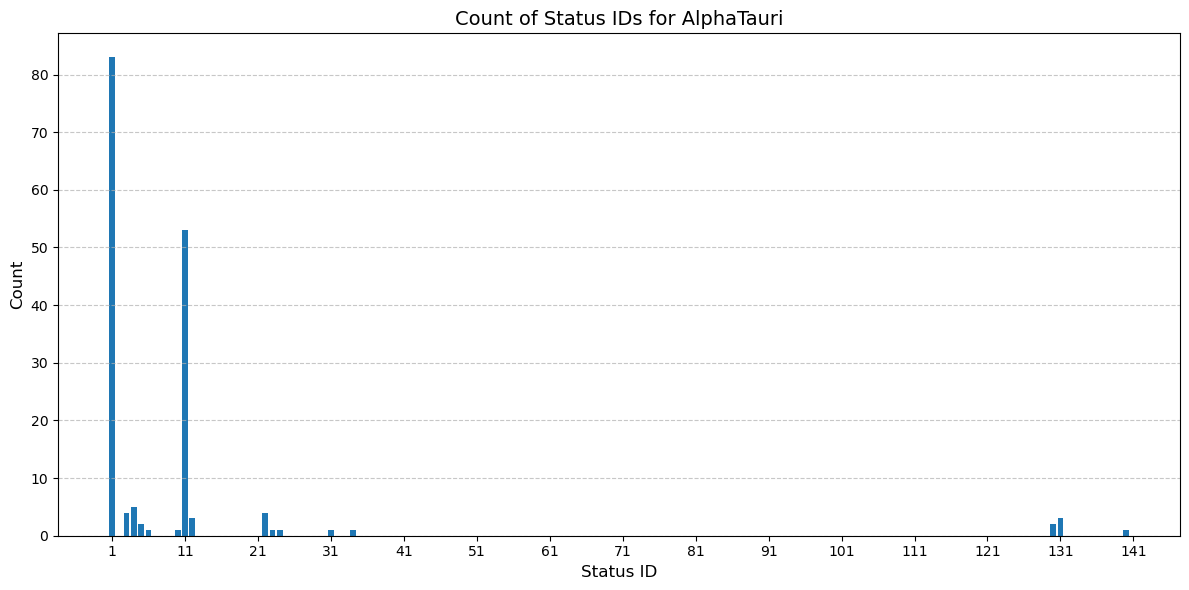

In [35]:
# Count the occurrences of each statusId for the constructor
status_counts = constructor213['statusId'].value_counts().sort_index()

status_table = pd.DataFrame({
    "Status ID": status_counts.index,
    "Count": status_counts.values
})

print(status_table)

# Visualise the count of each statusId
plt.figure(figsize=(12, 6))
plt.bar(status_counts.index, status_counts.values)
plt.title("Count of Status IDs for AlphaTauri", fontsize=14)
plt.xlabel("Status ID", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(range(1, 142, 10))  # Tick every 10 status IDs for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

The reliability of Alphatauri is an essential factor in shaping Liam's risk profile. For instance, his performance cannot be entirely isolated from the team's overall reliability and car performance. From the panel above, the high frequency of Status ID 1 (race finish) suggests that Lawson operates within a  dependable setup, enhancing his perceived risk profile positively. However, the occurrences of some non-completion statuses indicate that Alphatauri, while generally reliable, may at times encounter some reliability issues.

If an insurer assesses Lawson’s risk for motorsport coverage, they would likely consider this data alongside his race record. With no personal crashes, collisions, or mechanical failures recorded for Lawson in 2023, his clean status profile stands out, particularly when contrasted with the broader constructor data. 
